In [1]:
# Primero importamos las bibliotecas necesarias
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE, RandomOverSampler
from sklearn.model_selection import  train_test_split,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif  # ANOVA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    accuracy_score,
    log_loss,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    make_scorer,
    cohen_kappa_score
)
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight

In [2]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [4]:
df.shape

(1143, 13)

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
df.quality.nunique()

6

In [9]:
# Podríamos eliminar la columna 'Car_Name' ya que no parece tener un impacto significativo en el precio de venta.
df = df.drop('Id', axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


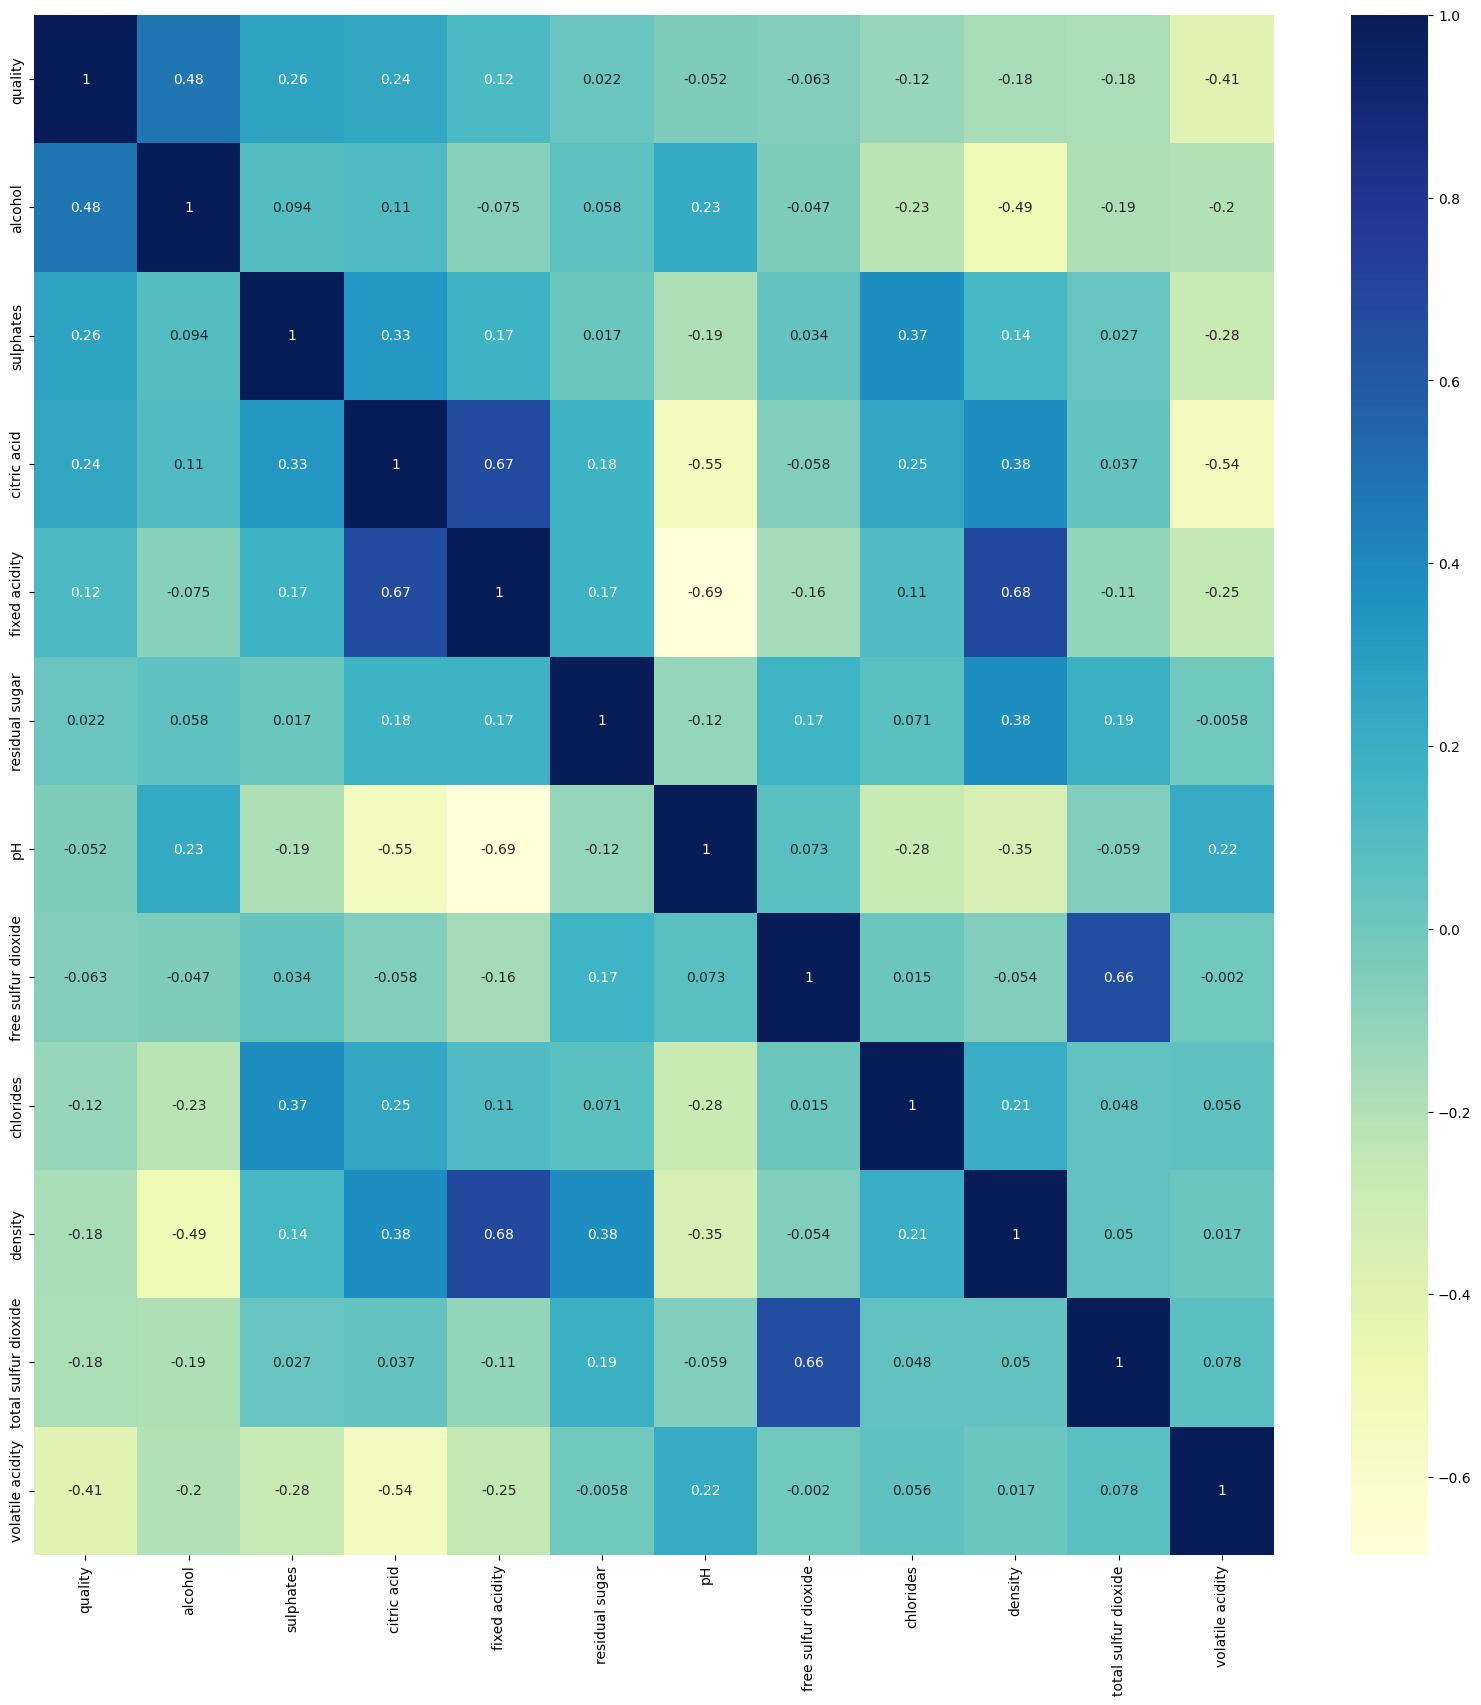

In [10]:
corr = df.corr()

corr_organizado_quality = corr['quality'].sort_values(ascending=False)
# top5_corr = corr.nlargest(5, 'Selling_Price')['Selling_Price'].index
# col1 = df[top5_corr].corr()
cols = corr_organizado_quality.index.tolist()

plt.figure(figsize=(20,20))
sns.heatmap(df[cols].corr(), annot=True, cmap='YlGnBu')
plt.show()

In [11]:
X = df.drop(['quality'], axis=1)

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [12]:
factor = pd.factorize(df['quality'])
df.quality = df.quality - 3
y = df.quality

y.head()

0    2
1    2
2    2
3    3
4    2
Name: quality, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=0
)

<Axes: xlabel='quality', ylabel='count'>

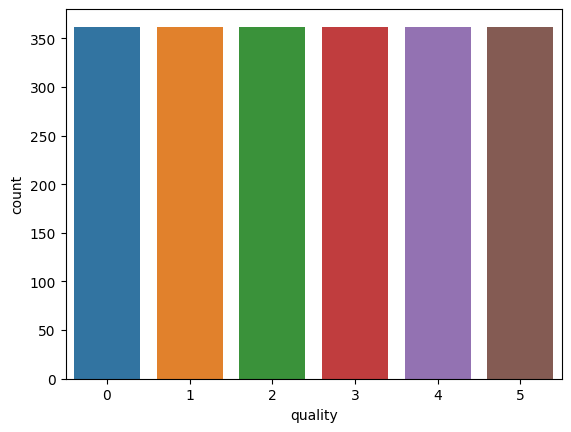

In [14]:
oversample = RandomOverSampler(random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)
sns.countplot(data=X_train, x=y_train)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
models = [
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier(),
    SVC(random_state=0),
    LogisticRegression(random_state=0),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
]

models_comparison = {}

for model in models:
    print(f"Model: {str(model)}\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
    print(classification_report(y_test, y_pred))
    print("-" * 30, "\n")
    models_comparison[f"{str(model)}"] = [
        accuracy_score(y_pred, y_test),
        f1_score(y_pred, y_test, average="macro"),
        precision_score(y_pred, y_test, average="macro"),
        recall_score(y_pred, y_test, average="macro"),
        (accuracies.mean()),
    ]

Model: DecisionTreeClassifier(random_state=0)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.18      0.25      0.21         8
           2       0.71      0.66      0.69       121
           3       0.57      0.60      0.59       116
           4       0.46      0.44      0.45        36
           5       0.33      0.25      0.29         4

    accuracy                           0.59       286
   macro avg       0.38      0.37      0.37       286
weighted avg       0.60      0.59      0.59       286

------------------------------ 

Model: RandomForestClassifier(random_state=0)



/home/fabian/Documents/Programacion/ML-Datapath/Proyecto/proyecto/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabian/Documents/Programacion/ML-Datapath/Proyecto/proyecto/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabian/Documents/Programacion/ML-Datapath/Proyecto/proyecto/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.25      0.12      0.17         8
           2       0.72      0.81      0.76       121
           3       0.64      0.64      0.64       116
           4       0.43      0.33      0.38        36
           5       0.50      0.25      0.33         4

    accuracy                           0.65       286
   macro avg       0.42      0.36      0.38       286
weighted avg       0.63      0.65      0.64       286

------------------------------ 

Model: KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.08      0.25      0.12         8
           2       0.66      0.50      0.57       121
           3       0.55      0.50      0.52       116
           4       0.30      0.44      0.36        36
           5       0.00      0.00      0.00         4

    accuracy 

/home/fabian/Documents/Programacion/ML-Datapath/Proyecto/proyecto/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabian/Documents/Programacion/ML-Datapath/Proyecto/proyecto/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabian/Documents/Programacion/ML-Datapath/Proyecto/proyecto/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.04      0.75      0.08         8
           2       0.00      0.00      0.00       121
           3       0.49      0.33      0.39       116
           4       0.31      0.42      0.36        36
           5       0.12      0.50      0.20         4

    accuracy                           0.21       286
   macro avg       0.16      0.33      0.17       286
weighted avg       0.24      0.21      0.21       286

------------------------------ 

Model: GradientBoostingClassifier()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         8
           2       0.70      0.78      0.74       121
           3       0.57      0.48      0.52       116
           4       0.36      0.44      0.40        36
           5       0.25      0.25      0.25         4

    acc

In [17]:
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
    "CV Accuracy",
]
models_com_df = models_com_df.sort_values(by="Model F1-Score", ascending=False)
models_com_df.style.format("{:.2%}").background_gradient(cmap="Blues")

,Model Accuracy,Model F1-Score,Precision,Recall,CV Accuracy
RandomForestClassifier(random_state=0),65.03%,37.92%,35.94%,42.29%,89.23%
DecisionTreeClassifier(random_state=0),59.09%,36.99%,36.82%,37.59%,85.41%
GradientBoostingClassifier(),58.39%,31.84%,32.57%,31.44%,88.49%
SVC(random_state=0),47.55%,26.66%,31.50%,27.59%,75.41%
KNeighborsClassifier(),47.90%,26.29%,28.31%,26.47%,81.17%
LogisticRegression(random_state=0),37.06%,21.39%,24.69%,24.91%,60.41%
AdaBoostClassifier(),21.33%,17.13%,33.24%,16.11%,27.85%


In [18]:
model = models[1]
str(model)

'RandomForestClassifier(random_state=0)'

In [19]:
from sklearn.metrics import confusion_matrix
reversefactor = dict(zip(range(6),range(3,9)))

# Predicting the Train set results
y_pred = model.predict(X_test)

y_test_factored = np.vectorize(reversefactor.get)(y_test)
y_pred_factored = np.vectorize(reversefactor.get)(y_pred)

# Making the Confusion Matrix
print(pd.crosstab(y_test_factored, y_pred_factored, rownames=['Actual Quality'], colnames=['Predicted Quality']))

Predicted Quality  4   5   6   7  8
Actual Quality                     
3                  0   1   0   0  0
4                  1   6   1   0  0
5                  2  98  17   4  0
6                  1  30  74  10  1
7                  0   2  22  12  0
8                  0   0   1   2  1


In [20]:
model.score(X_test, y_test)

0.6503496503496503

In [21]:
import pickle

pickle.dump(model, open('model.pkl','wb'))

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
for column in df.columns:
    print(f'<div class="form-group">\n<label for="{column}">{column}</label>\n<input type="number" class="form-control" id="{column}" name="{column}" required>\n</div>\n')

In [ ]:
columns = []
for column in df.columns:
    column = column.replace(' ', '_')
    columns.append(column)
columns